In [1]:
import sys
sys.path.insert(0, "../../")
from classes.calculators.lennardjones import LennardJones
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter
from classes.optimizers.particle_swarm import Particle_swarm
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import copy
plt.rc('animation', html='jshtml')

{'atoms': [<matplotlib.lines.Line2D at 0x1e61ae8c710>,
 'unit_cell': None,
 'extra_cells': None}

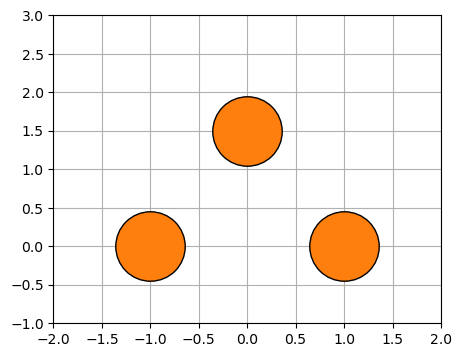

In [2]:
atomlist = []
positions = [np.array([-1.5,-1.5]), np.array([-1.0,0.0]), np.array([1.0,0.0]), np.array([0.0, 1.5])]
colors = ["C0", "C1", "C1", "C1"]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-1.0,3.0])

atom_plotter = Atom_Collection_Plotter()

for position, color in zip(positions, colors):
    atom = Atom(position=position)
    atomlist.append(atom)
ax.grid()
atom_col = Atom_Collection(atomlist=atomlist)
atom_col.freeze_atoms(indices=[1,2,3])
atom_col.calculator = LennardJones()
atom_plotter(atom_col=atom_col, ax = ax)

In [18]:
rattled_atoms = []
for i in range(30):
    rattled_col = copy.deepcopy(atom_col)
    rattled_col.rattle_atoms(rattle_steps=3, delta=0.5)
    rattled_col.calculator = LennardJones()
    rattled_atoms.append(rattled_col)
particle_swarmer = Particle_swarm(atom_col=atom_col, rattled_atom_cols=rattled_atoms)
particle_swarmer.run(N_max=5000, E_crit=-20)

{'atoms': [<matplotlib.lines.Line2D at 0x1c02d821350>,
 'unit_cell': None}

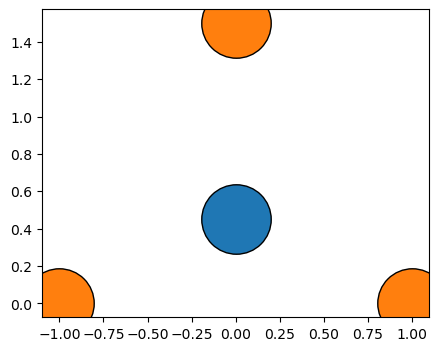

In [19]:
fig, ax = plt.subplots(figsize=(5,4))
best_col = particle_swarmer.global_best_particle.atom_col
atom_plotter(atom_col=best_col, ax=ax)

In [20]:
print(particle_swarmer.global_best_energy)

-13.601824533031932
